<a href="https://colab.research.google.com/github/devloren/neuralnets/blob/main/OLA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For reading data sets from the web.
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
import sympy as sp
sp.init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# We will grab another data set using Keras
# after we finish up with Iris...
import tensorflow.keras as keras

In [2]:
iris_data = np.array(
pandas.read_table(
"https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt",
delim_whitespace=True,
header=None))

In [3]:
# Remember the data is composed of feature
# vectors AND class labels...
X = iris_data[:,0:4] # 0,1,2,3
Y = iris_data[:,4].astype(int) # 4
# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(sp.Matrix(np.unique(Y)).T)

[0  1  2]

In [5]:
# Mean center a vector
def mean_center(x):
  return x - np.mean(x)
# Call this function for each column in the data (move along axis 0 or the rows)
Xcentered = np.apply_along_axis(mean_center,0,X)

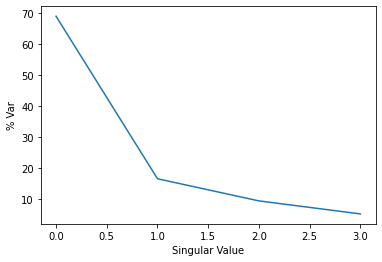

In [6]:
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)
# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [7]:
# Variance accounted for in the first two principal components
100.0*(S[0]+S[1])/np.sum(S)

In [8]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)
# Extract just the first two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

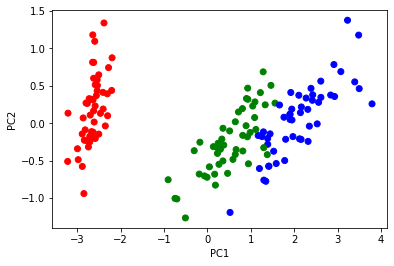

In [9]:
# The x and y values come from the two
# Principal Components and the colors for
# each point are selected based on the
# corresponding iris species for each point...
plt.scatter(PCs[:,0],PCs[:,1],
color=[['red','green','blue'][i] for i in Y])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [10]:
pca = PCA(2)
PCs = pca.fit_transform(X)[:,0:2]

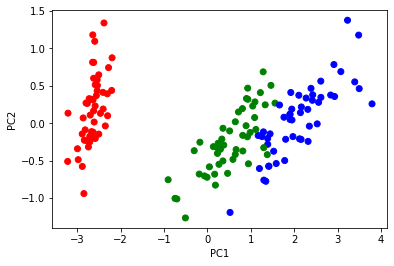

In [11]:
plt.scatter(PCs[:,0],PCs[:,1],
color=[['red','green','blue'][i] for i in Y])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [12]:
# Load the MNIST data set using Keras
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Subsample (there's a lot of data here!)
X = x_train[range(0,x_train.shape[0],10),:,:]
Y = y_train[range(0,y_train.shape[0],10)].astype(int)
display(X.shape)
display(Y.shape)

11501568/11490434 [==============================] - 0s 0us/step


In [13]:
X = X.astype('float32') / 255.0

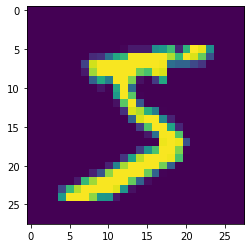

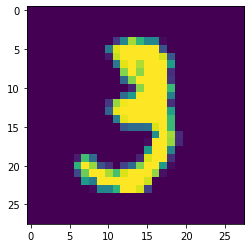

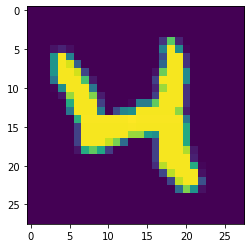

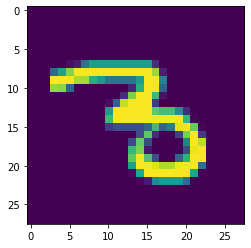

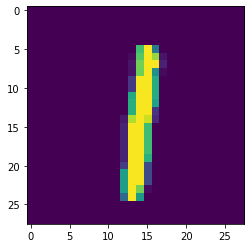

In [15]:
# Plot some of the images
for i in range(5):
  plt.figure()
  plt.imshow(X[i,:,:])
  plt.show()

In [16]:
# What are their corresponding class labels?
display(sp.Matrix(Y[0:5]))


⎡5⎤
⎢ ⎥
⎢3⎥
⎢ ⎥
⎢4⎥
⎢ ⎥
⎢3⎥
⎢ ⎥
⎣1⎦

In [17]:
X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X.shape

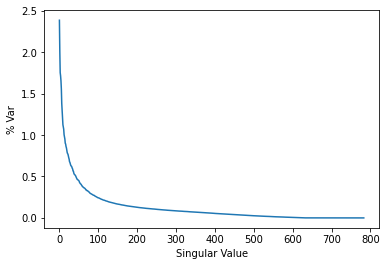

In [18]:
# Mean-centering
Xcentered = np.apply_along_axis(mean_center,0,X)
# SVD
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)
# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [19]:
# Variance accounted for in the first two principal components
100.0*(S[0]+S[1])/np.sum(S)


In [20]:
# Variance accounted for in the first two principal components
display(100.0*(np.sum(S[0:340]))/np.sum(S))
# Reduction?
display(100*340/len(S))

In [21]:
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)
# First two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

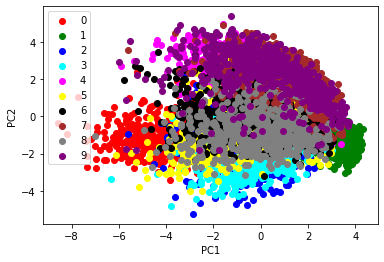

In [23]:
# Need a lot of colors for this one!
colors = ['red','green','blue',
'cyan','magenta','yellow',
'black','brown','grey','purple']
for i in range(len(colors)):
  plt.scatter(PCs[Y==i,0],
PCs[Y==i,1],
color=colors[i])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.show()

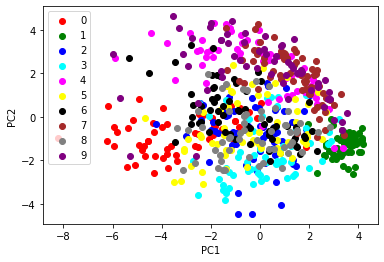

In [25]:
# Need a lot of colors for this one!
colors = ['red','green','blue',
'cyan','magenta','yellow',
'black','brown','grey','purple']
for i in range(len(colors)):
  plt.scatter(PCs[Y==i,0][0::10],
PCs[Y==i,1][0::10],
color=colors[i])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.show()


In [26]:
from sklearn.manifold import TSNE

In [27]:
%%time
pca = PCA(2)
PCs = pca.fit_transform(X)[:,0:2]

CPU times: user 304 ms, sys: 202 ms, total: 506 ms
Wall time: 504 ms


In [28]:
%%time
NPCs = TSNE(n_components=2).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 1min 50s, sys: 1.63 s, total: 1min 52s
Wall time: 1min 4s


In [29]:
# Two non-linear principal components (NPCs)
NPCs.shape

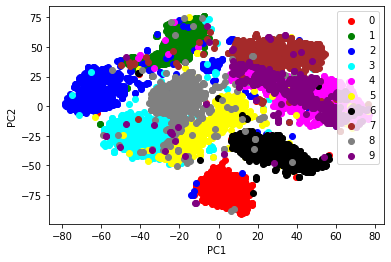

In [31]:
# Need a lot of colors for this one!
colors = ['red','green','blue',
'cyan','magenta','yellow',
'black','brown','grey','purple']
for i in range(len(colors)):
  plt.scatter(NPCs[Y.astype(int)==i,0],
NPCs[Y.astype(int)==i,1],
color=colors[i])
#handles, labels = legend_elements(num=10)
#print(handles)
#plt.title(" ".join(["%d - %s"%( for ]))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.show()